In [50]:
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns
from funclib.iolib import folder_open
from dblib import mssql



INCH = 2.54

sns.set()

#gey = ["#FFFFFF", "#999999", "#666666", "#333333", "#000000"]
#grey = ["#FFFFFF", "#111111"]
#sns.set_palette(sns.color_palette("cubehelix", 8))

sns.set(font="Times New Roman", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set_style('ticks') #rc={'axes.grid':True}

def cm2inch1(v):
    '''(int|float)->int|float
    '''
    return v / INCH

INCH = 2.54

class FigWidths(Enum):
    minimal = 3
    single_col = 9
    one_and_a_half_col = 14
    two_col = 19

def getwidth(sz, as_inch=True):
    '''(Enum:FigWidths|float, bool)->float

    Get publication fig widths in cm or inches
    '''
    assert isinstance(sz, FigWidths)
    return sz.value/INCH if as_inch else sz.value

def getheight(width, aspect, width_is_cm=True):
    '''float|Enum:plotlib.FigWidths, float|None
    Get width in inches according to target aspect

    width:target width, or Enum instance plotlib.FigWidths
    aspect:ratio of width to height i.e. w/h
    '''
    assert isinstance(width, (float, int, FigWidths))

    if isinstance(width, FigWidths):
        w_inch = width.value / INCH
    else:
        w_inch = width / INCH if width_is_cm else width
    return w_inch / aspect

In [16]:
sql="select Platform ,CNN ,Scale ,abs(error_perc) as [MAE Percent] from v_mv_imgscales_all where not error is null"
with mssql.Conn('imagedb', '(local)') as cnn:
    df = pd.read_sql(sql, cnn)
list(df)

#This next data is for the second axis,



['Platform', 'CNN', 'Scale', 'MAE Percent']

In [3]:
#mv_scale_score_low_high_cnts.sql

#Load Afloat
sql="select 'Valid' as Detections, good.scale as Scale, (good_cnt/(good_cnt+bad_cnt+0.000001))*100 as [Valid %] from ( select count(*) as good_cnt ,scale from v_mv_imgscales_all where score>=0.5 and Platform='Afloat' group by scale ) as good inner join ( select count(*) as bad_cnt, scale from v_mv_imgscales_all where score<0.5 and Platform='Afloat' group by scale) as bad on good.scale=bad.scale order by scale asc "
with mssql.Conn('imagedb', '(local)') as cnn:
    df_afloat = pd.read_sql(sql, cnn)

#Load Shore
sql="select 'Valid' as Detections, good.scale as Scale,(good_cnt/(good_cnt+isnull(bad_cnt,0)+0.000001))*100 as [Valid %] from ( select count(*) as good_cnt ,scale from v_mv_imgscales_all where score>=0.5 and Platform='Shore' group by scale ) as good left join ( select count(*) as bad_cnt, scale from v_mv_imgscales_all where score<0.5 and Platform='Shore' group by scale) as bad on good.scale=bad.scale order by scale asc "
with mssql.Conn('imagedb', '(local)') as cnn:
    df_shore = pd.read_sql(sql, cnn)

list(df_shore)
#print(df_shore.Valid, df_shore.Scale)



['Detections', 'Scale', 'Valid %']

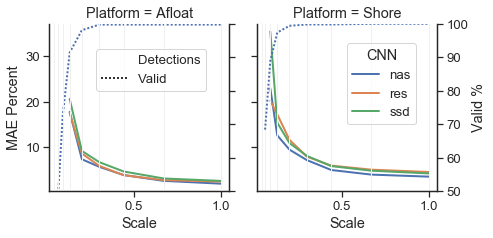

In [78]:
H = getheight(width=FigWidths.single_col, aspect=2)
#print(H)
#H=H*2
H = 3.543
aspect = 1.5
all_xticks = [0.04,0.06,0.09,0.13,0.2,0.3,0.44,0.67,1]

#https://matplotlib.org/users/colors.html
#https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
color = ['0.5', 'b', 'g']
#d = {'color': color , 'ls' : ["None", "None", "None"]}

g = sns.FacetGrid(df, col='Platform', height=H, aspect=1, hue='CNN', hue_kws={'markers':['+','o','-']}) #, hue_kws=d
g.map(sns.lineplot, 'Scale', 'MAE Percent', ci=None, markers=True)


plt.legend(loc=(0.5,0.4), title='CNN')
axAfloat = g.axes[0,0]
axShore = g.axes[0,1]

#AFLOAT1  
axAfloat1 = axAfloat.twinx()
sns.lineplot(x="Scale", y="Valid %", style="Detections", data=df_afloat, ax=axAfloat1, dashes={'Valid':(1,1)})
axAfloat1.set_ylim(50, 100)
labels = [item.get_text() for item in axAfloat1.get_yticklabels()]
empty_string_labels = ['']*len(labels)
axAfloat1.set_yticklabels(empty_string_labels)
axAfloat1.yaxis.label.set_visible(False)

plt.legend(loc=(0.26,0.6), title='')

#SHORE1
axShore1 = axShore.twinx()
sns.lineplot(x="Scale", y="Valid %", style="Detections", data=df_shore, ax=axShore1, dashes={'Valid':(1,1)})
axShore1.set_ylim(50, 100)
for v in all_xticks:
    axAfloat1.axvline(x=v, aa=False, color='#F0F0F0', linewidth=0.5)
    
for v in all_xticks:
    axShore.axvline(x=v, aa=False, color='#F0F0F0', linewidth=0.5)
#axAfloat1.get_yaxis().set_ticks([])



axShore1.legend_.remove()
plt.tight_layout()
sns.despine(top=True, right=False)




plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/scale_and_det.eps', dpi=500)
plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/scale_and_det.jpg')
folder_open('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images')

In [29]:
getheight(width=FigWidths.one_and_a_half_col, aspect=1)

5.511811023622047

In [ ]:
H = getheight(width=FigWidths.single_col, aspect=2)
#print(H)
#H=H*2
H = 3.543
aspect = 1
all_xticks = [0.04,0.06,0.09,0.13,0.2,0.3,0.44,0.67,1]

#https://matplotlib.org/users/colors.html
#https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
color = ['0.5', 'b', 'g']
#d = {'color': color , 'ls' : ["None", "None", "None"]}

g = sns.lineplot(x='Scale', y='MAE Percent', hue='CNN', markers=['+','o','-'], ci=None, markers=True, data=df)

plt.legend(loc=(0.5,0.4), title='CNN')
ax = g.axes[0,0]


#AFLOAT1  
ax1 = ax.twinx()
sns.lineplot(x="Scale", y="Valid %", style="Detections", data=df_afloat, ax=axAfloat1, dashes={'Valid':(1,1)})
ax1.set_ylim(50, 100)
labels = [item.get_text() for item in ax1.get_yticklabels()]
empty_string_labels = ['']*len(labels)
ax1.set_yticklabels(empty_string_labels)
ax1.yaxis.label.set_visible(False)

plt.legend(loc=(0.26,0.6), title='')

#SHORE1
axShore1 = axShore.twinx()
sns.lineplot(x="Scale", y="Valid %", style="Detections", data=df_shore, ax=axShore1, dashes={'Valid':(1,1)})
axShore1.set_ylim(50, 100)
for v in all_xticks:
    axAfloat1.axvline(x=v, aa=False, color='#F0F0F0', linewidth=0.5)
    
for v in all_xticks:
    axShore.axvline(x=v, aa=False, color='#F0F0F0', linewidth=0.5)
#axAfloat1.get_yaxis().set_ticks([])



axShore1.legend_.remove()
plt.tight_layout()
sns.despine(top=True, right=False)




plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/scale_and_det_one.eps', dpi=500)
plt.savefig('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images/scale_and_det_one.jpg')
folder_open('C:/Users/Graham Monkman/OneDrive/Documents/PHD/My Papers/Fiducial_machine_vision_estimates/images')